![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder.

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy is, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Instructions

1. Import the necessary libraries.
2. Load the `we_fn_use_c_marketing_customer_value_analysis.csv` into the variable `customer_df`.
3. First look at its main features (`head`, `shape`, `info`).
4. Rename the columns so they follow the _PE8_ (snake case).
5. Change effective to date column to datetime format.
6. Check `NaN` values per column.
7. Define a function that differentiates between continuous and discrete variables. **Hint**: A number of unique values might be useful. Store continuous data into a `continuous` variable and do the same for `discrete` and categorical.
8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. **Hint**: Use the same method you used in step 7. Depending on the implementation, decide what to do with the variables you get.
9. Get categorical features.
10. What should we do with the `customer_id` column?


# Morning lab

In [1]:
import pandas as pd
import numpy as np
import datetime
import warnings

warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

%matplotlib inline

pd.set_option('display.max_columns', None)

In [2]:
customer_df = pd.read_csv('files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv')
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [3]:
customer_df.shape

(9134, 24)

In [4]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4. Rename the columns so they follow the PE8 (snake case).

In [5]:
new_columns = []
for i in customer_df.columns:
    i = i.lower().replace(' ', '_')
    new_columns.append(i)

customer_df.columns = new_columns
customer_df.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [6]:
customer_df['employment_status'] = customer_df.employmentstatus

In [7]:
customer_df.drop(['employmentstatus'],axis=1)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,employment_status
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Employed
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Unemployed
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Employed
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,Unemployed
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,Employed
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,Employed
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,Unemployed
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,Employed


5. Change effective to date column to datetime format.

In [8]:
customer_df.effective_to_date = pd.to_datetime(customer_df.effective_to_date)

In [9]:
customer_df.dtypes

customer                                 object
state                                    object
customer_lifetime_value                 float64
response                                 object
coverage                                 object
education                                object
effective_to_date                datetime64[ns]
employmentstatus                         object
gender                                   object
income                                    int64
location_code                            object
marital_status                           object
monthly_premium_auto                      int64
months_since_last_claim                   int64
months_since_policy_inception             int64
number_of_open_complaints                 int64
number_of_policies                        int64
policy_type                              object
policy                                   object
renew_offer_type                         object
sales_channel                           

In [10]:
customer_df['month'] = pd.DatetimeIndex(customer_df['effective_to_date']).month
customer_df['day'] = pd.DatetimeIndex(customer_df['effective_to_date']).day
customer_df['week'] = pd.DatetimeIndex(customer_df['effective_to_date']).week
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,employment_status,month,day,week
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Employed,2,24,8
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Unemployed,1,31,5
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Employed,2,19,7
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,Unemployed,1,20,3
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Employed,2,3,5


6. Check NaN values per column.

In [11]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
employment_status                0
month                            0
day                              0
week                             0
dtype: int64

In [12]:
customer_df[customer_df == ''].any()

customer                         False
state                            False
customer_lifetime_value          False
response                         False
coverage                         False
education                        False
effective_to_date                False
employmentstatus                 False
gender                           False
income                           False
location_code                    False
marital_status                   False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
policy_type                      False
policy                           False
renew_offer_type                 False
sales_channel                    False
total_claim_amount               False
vehicle_class                    False
vehicle_size                     False
employment_status                False
month                    

In [13]:
customer_df[customer_df == ' '].any()

customer                         False
state                            False
customer_lifetime_value          False
response                         False
coverage                         False
education                        False
effective_to_date                False
employmentstatus                 False
gender                           False
income                           False
location_code                    False
marital_status                   False
monthly_premium_auto             False
months_since_last_claim          False
months_since_policy_inception    False
number_of_open_complaints        False
number_of_policies               False
policy_type                      False
policy                           False
renew_offer_type                 False
sales_channel                    False
total_claim_amount               False
vehicle_class                    False
vehicle_size                     False
employment_status                False
month                    

7. Define a function that differentiates between continuous and discrete variables. Hint: A number of unique values might be useful. Store continuous data into a continuous variable and do the same for discrete and categorical.

In [14]:
customer_df.head()

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,employment_status,month,day,week
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Employed,2,24,8
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Unemployed,1,31,5
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Employed,2,19,7
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,Unemployed,1,20,3
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Employed,2,3,5


In [15]:
categorical = customer_df.select_dtypes(include=np.object)
categorical.columns

Index(['customer', 'state', 'response', 'coverage', 'education',
       'employmentstatus', 'gender', 'location_code', 'marital_status',
       'policy_type', 'policy', 'renew_offer_type', 'sales_channel',
       'vehicle_class', 'vehicle_size', 'employment_status'],
      dtype='object')

In [17]:
numerical = customer_df.select_dtypes(include=np.number)
numerical.columns

Index(['customer_lifetime_value', 'income', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'total_claim_amount',
       'month', 'day', 'week'],
      dtype='object')

In [18]:
numerical = numerical.drop('total_claim_amount',axis=1)
numerical.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,day,week
0,2763.519279,56274,69,32,5,0,1,2,24,8
1,6979.535903,0,94,13,42,0,8,1,31,5
2,12887.431650,48767,108,18,38,0,2,2,19,7
3,7645.861827,0,106,18,65,0,7,1,20,3
4,2813.692575,43836,73,12,44,0,1,2,3,5


In [19]:
continuous = 'customer_lifetime_value', 'income', 'monthly_preimum_auto', 'months_since_last_claim', 'months_since_policy_inception','total_claim_amount'
discrete = 'number_of_open_complaints','number_of_policies',

In [20]:
customer_df.months_since_last_claim.unique()

array([32, 13, 18, 12, 14,  0, 17, 23, 27,  9, 21, 11, 31,  8,  4, 30, 22,
       15, 33,  1, 19, 28, 10,  7,  3,  5, 20, 24, 29, 34,  6, 35,  2, 16,
       26, 25])

In [21]:
def numerical_types(df, types):
    num_discrete = []
    num_continuous = []
    num = df.select_dtypes(include=np.number)
    for i in num.columns:
        if 'number' in i:
            num_discrete.append(i)
        else:
            num_continuous.append(i)
    if types == 'discrete':
        x = num[num_discrete]
    else:
        x = num[num_continuous]
    
    return x
    
numerical_types(customer_df,'discrete')

,number_of_open_complaints,number_of_policies
0,0,1
1,0,8
2,0,2
3,0,7
4,0,1
...,...,...
9129,0,2
9130,0,1
9131,3,2
9132,0,3


8. For the categorical data, check if there is some kind of text in a variable so we would need to clean it. Hint: Use the same method you used in step 7

In [22]:
categorical = customer_df.select_dtypes(include=np.object)
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,employment_status
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,Employed
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,Unemployed
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,Employed
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,Unemployed
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,Employed
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,Employed
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,Unemployed
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large,Employed


In [23]:
for column in categorical:
    if column != 'customer':
        cat_column = categorical[column]
        print(column)
        print(set(cat_column))
        print('--')

state
{'Washington', 'Arizona', 'California', 'Oregon', 'Nevada'}
--
response
{'Yes', 'No'}
--
coverage
{'Premium', 'Extended', 'Basic'}
--
education
{'Bachelor', 'Master', 'High School or Below', 'Doctor', 'College'}
--
employmentstatus
{'Employed', 'Medical Leave', 'Disabled', 'Unemployed', 'Retired'}
--
gender
{'F', 'M'}
--
location_code
{'Rural', 'Suburban', 'Urban'}
--
marital_status
{'Single', 'Married', 'Divorced'}
--
policy_type
{'Personal Auto', 'Special Auto', 'Corporate Auto'}
--
policy
{'Personal L1', 'Corporate L3', 'Personal L2', 'Corporate L1', 'Special L3', 'Personal L3', 'Corporate L2', 'Special L2', 'Special L1'}
--
renew_offer_type
{'Offer1', 'Offer2', 'Offer3', 'Offer4'}
--
sales_channel
{'Call Center', 'Web', 'Branch', 'Agent'}
--
vehicle_class
{'SUV', 'Two-Door Car', 'Four-Door Car', 'Sports Car', 'Luxury Car', 'Luxury SUV'}
--
vehicle_size
{'Medsize', 'Small', 'Large'}
--
employment_status
{'Employed', 'Medical Leave', 'Disabled', 'Unemployed', 'Retired'}
--


In [24]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,employment_status,month,day,week
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Employed,2,24,8
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Unemployed,1,31,5
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Employed,2,19,7
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,Unemployed,1,20,3
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Employed,2,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize,Employed,2,10,6
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize,Employed,2,12,6
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize,Unemployed,2,6,5
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large,Employed,2,3,5


10. What should we do with the customer_id column?

In [25]:
customer_df = customer_df.set_index('customer')
customer_df.head()

,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,employment_status,month,day,week
customer,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,Employed,2,24,8
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,Unemployed,1,31,5
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,Employed,2,19,7
WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,Unemployed,1,20,3
HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,Employed,2,3,5


# Afternoon lab
1. Import the necessary libraries if you are starting a new notebook.
2. Load the continuous and discrete variables into `continuous_df` and `discrete_df` variables.

In [26]:
discrete_df = numerical_types(customer_df,'discrete')
continuous_df = numerical_types(customer_df,'continuous')

3. Plot a correlation matrix, what can you see?

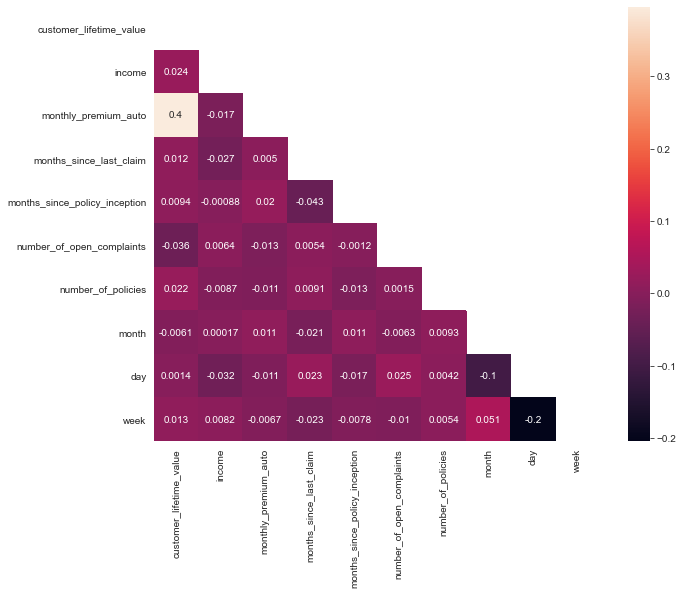

In [27]:
correlations_matrix = numerical.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

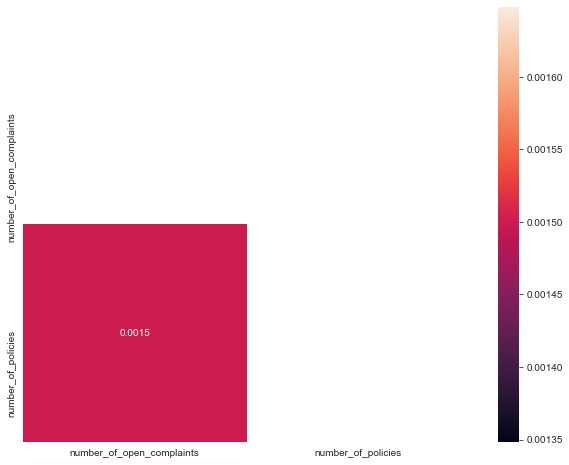

In [28]:
mask = np.zeros_like(discrete_df.corr()) 
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(discrete_df.corr(), mask=mask, annot=True)
plt.show()

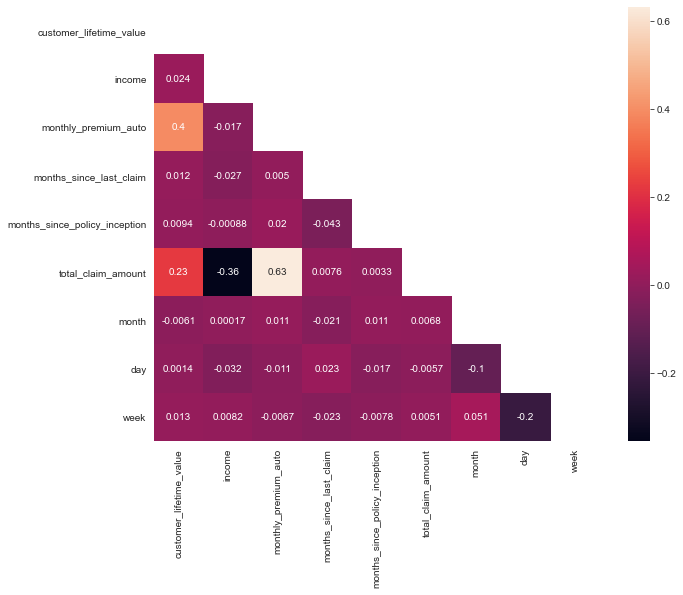

In [29]:
mask = np.zeros_like(continuous_df.corr()) 
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(continuous_df.corr(), mask=mask, annot=True)
plt.show()

4. Create a function to plot every discrete variables. Do the same with continuous variables (be careful, you may change the plot type to another one better suited for continuous data).

In [30]:
discrete_df.columns

Index(['number_of_open_complaints', 'number_of_policies'], dtype='object')

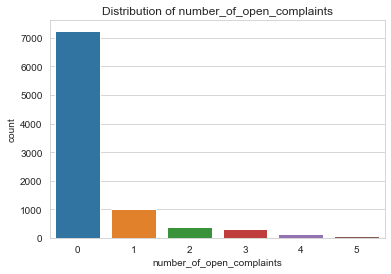

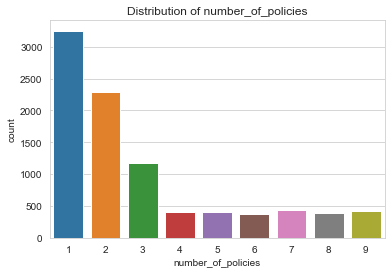

In [31]:
def plot_discrete(df):
    for i in df.columns:
        plt.figure()
        sns.countplot(x=i,data=df).set_title('Distribution of {}'.format(i))
plot_discrete(discrete_df)

**customer lifetime value**: we have lots of outliers. We should scale it or make another dataset with the outliers.
The median is below 10000. It is positive skewed so, the median is higher than the mean.

**income**: the minimum and the Q1 are the same. There is a negative skew, the mean is higher than the median.
No outliers.

**monthly_premium_auto**: There are a lot of outliers. If we compare this feature with education we see 'Doctors' have
less outliers its last quartile is shorter --> sns.boxplot(x='monthly_premium_auto', y='education',data=customer_df )

**months_since_last_claim**: on average people claim a little over a year. It doesn't have outliers. 3 quarters of people claim up to 2 years or less.

**months_since_policy_inception**: it seems to follow a normal distribution. On average, the median length of months for taking out policy is under 50.

**total_claim_amount**: most people claim less than $1000, although we have a lot of outliers that tells us we should scale the colum or make another dataset with the outliers.

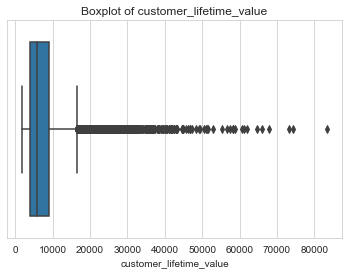

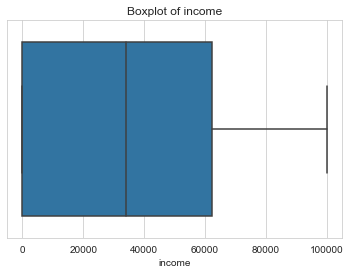

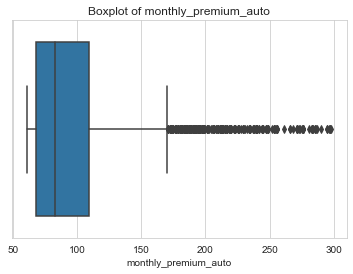

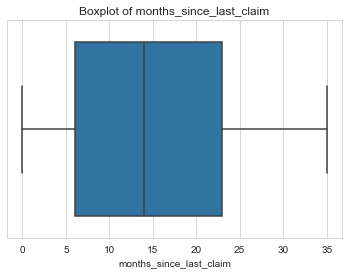

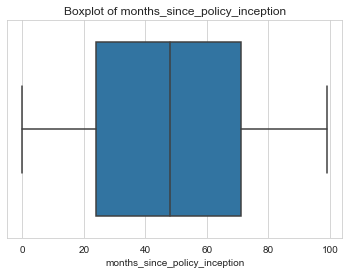

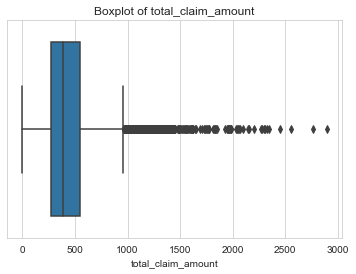

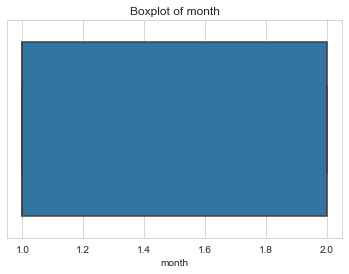

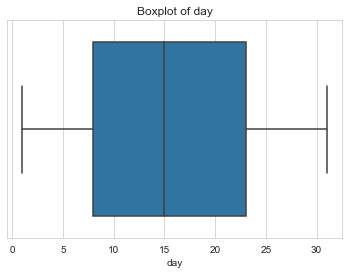

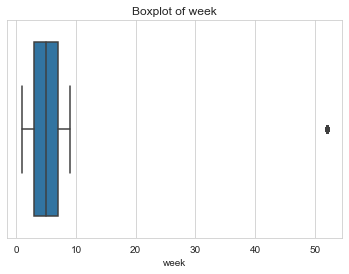

In [32]:
def plot_continuous(df):
    for i in df.columns:
        plt.figure()
        sns.boxplot(x=i,data=df).set_title('Boxplot of {}'.format(i))
plot_continuous(continuous_df)

5. What can you see in the plots? 
6. Look for outliers in the continuous variables we have found. Hint: There was a good plot to do that.
7. Have you found outliers? If you have, what should we do with them?

**number_of_open_complaint**: it would be good to cluster in open complaint and not open complaint due to the big amount of not open complaints vs the other values.

**number_of_policies**: the majority of people has max. 3 policies. We could group into: 1,2,3,more than 3.

**customer lifetime value**: we have lots of outliers. We should scale it or make another dataset with the outliers.
The median is below 10000. It is positive skewed so, the median is higher than the mean.

**income**: the minimum and the Q1 are the same. There is a negative skew, the mean is higher than the median.
No outliers.

**monthly_premium_auto**: There are a lot of outliers. If we compare this feature with education we see 'Doctors' have
less outliers its last quartile is shorter --> sns.boxplot(x='monthly_premium_auto', y='education',data=customer_df )

**months_since_last_claim**: on average people claim a little over a year. It doesn't have outliers. 3 quarters of people claim up to 2 years or less.

**months_since_policy_inception**: it seems to follow a normal distribution. On average, the median length of months for taking out policy is under 50.

**total_claim_amount**: most people claim less than $1000, although we have a lot of outliers that tells us we should scale the colum or make another dataset with the outliers.

# Day 2 morning lab 

# Lab | Feature extraction

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. Open the `categoricals` variable we created before.

```python
categoricals = data.select_dtypes(np.object)
categoricals.head()
```

In [33]:
categorical.head()

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,employment_status
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,Employed
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,Unemployed
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,Employed
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,Unemployed
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,Employed


2. Plot all the categorical variables with the proper plot. What can you see?

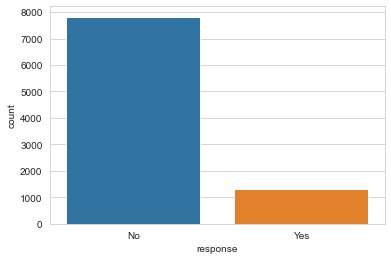

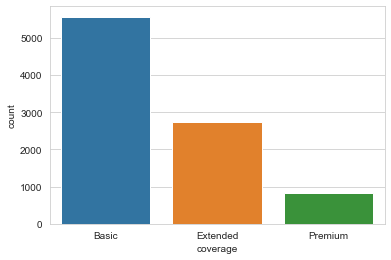

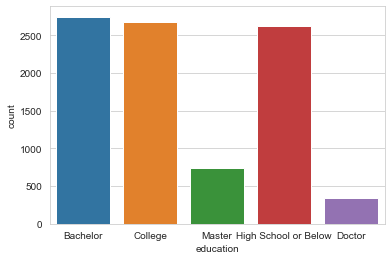

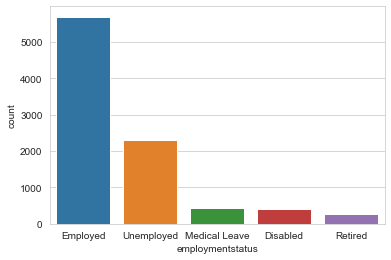

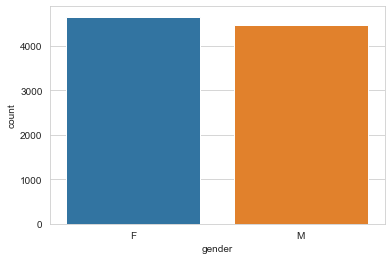

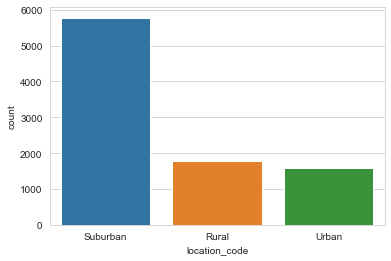

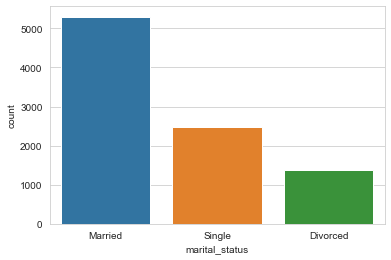

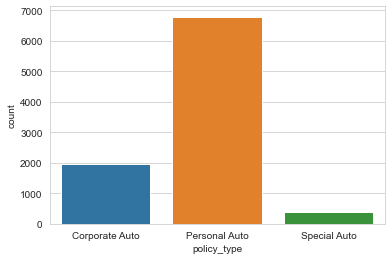

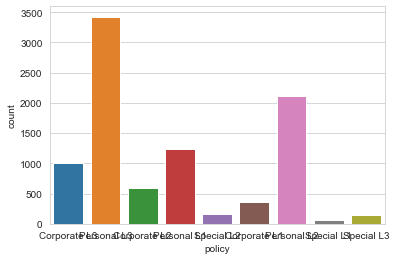

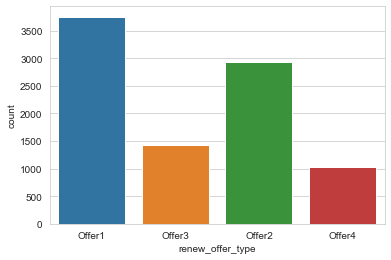

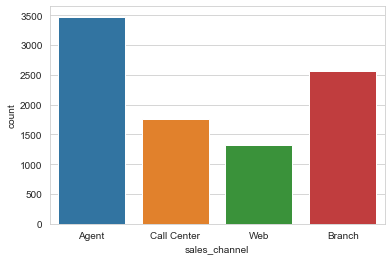

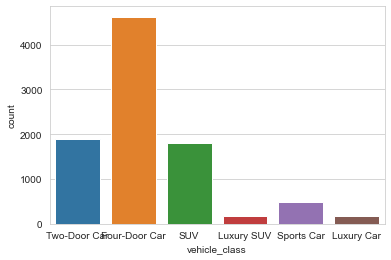

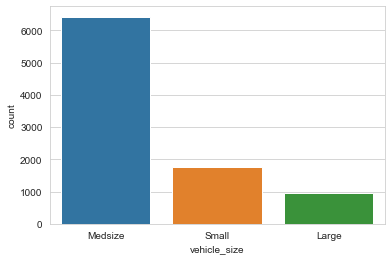

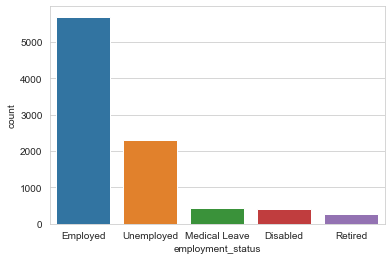

In [34]:
cat2 = categorical.copy()
cat2 = cat2.drop(['customer','state'],axis=1)
def plot_cat(df):
    for i in df.columns:
        plt.figure()
        sns.countplot(x=i,data=df)
plot_cat(cat2)

3. There might be some columns that seem to be redundant, check their values to be sure. What should we do with them?
4. Plot time variable. Can you extract something from it?

# Day 2 Afternoon lab

# Lab | Data cleaning and wrangling

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

So far we have worked on `EDA`. This lab will focus on data cleaning and wrangling from everything we noticed before.

1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
2. Create a copy of the dataframe for the data wrangling.
3. Normalize the continuous variables. You can use any one method you want.
4. Encode the categorical variables
5. The time variable can be useful. Try to transform its data into a useful one. Hint: Day week and month as integers might be useful.
6. Since the model will only accept numerical data, check and make sure that every column is numerical, if some are not, change it using encoding.

**Hint for Categorical Variables**

- You should deal with the categorical variables as shown below (for ordinal encoding, dummy code has been provided as well):

```python
# One hot to state
# Ordinal to coverage
# Ordinal to employmentstatus
# Ordinal to location code
# One hot to marital status
# One hot to policy type
# One hot to policy
# One hot to renew offercustomer_df
# One hot to sales channel
# One hot vehicle class
# Ordinal vehicle size

data["coverage"] = data["coverage"].map({"Basic" : 0, "Extended" : 1, "Premium" : 2})
# given that column "coverage" in the dataframe "data" has three categories:
# "basic", "extended", and "premium" and values are to be represented in the same order.
```



1. We will start with removing outliers. So far, we have discussed different methods to remove outliers. Use the one you feel more comfortable with, define a function for that. Use the function to remove the outliers and apply it to the dataframe.
- I am going to scale numericals
- I am ging to cluster the discrete columns
- CATS?

#### Scale numericals to try to deal with outliers

In [35]:
continuous_df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,month,day,week
customer,,,,,,,,,
BU79786,2763.519279,56274,69,32,5,384.811147,2,24,8
QZ44356,6979.535903,0,94,13,42,1131.464935,1,31,5
AI49188,12887.431650,48767,108,18,38,566.472247,2,19,7
WW63253,7645.861827,0,106,18,65,529.881344,1,20,3
HB64268,2813.692575,43836,73,12,44,138.130879,2,3,5
...,...,...,...,...,...,...,...,...,...
LA72316,23405.987980,71941,73,18,89,198.234764,2,10,6
PK87824,3096.511217,21604,79,14,28,379.200000,2,12,6
TD14365,8163.890428,0,85,9,37,790.784983,2,6,5


In [36]:
def plotting(df):
    for i in range(len(df.columns)-1):
        plt.figure()
        sns.displot(df, x=df.columns[i])

In [37]:
def scaling_methods(df,scaler):
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import Normalizer
    if scaler == 'standard':
        scaler = StandardScaler()
    elif scaler == 'minmax':
        scaler = MinMaxScaler()
    elif scaler == 'normalize':
        scaler = Normalizer()
    X_scaler = scaler.fit_transform(df)
    X_scaler = pd.DataFrame(X_scaler)
    X_scaler.columns = df.columns
    return X_scaler

In [38]:
minmax_continuous_df = scaling_methods(continuous_df,'minmax')
minmax_continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,month,day,week
0,0.010629,0.562847,0.033755,0.914286,0.050505,0.132974,1.0,0.766667,0.137255
1,0.062406,0.000000,0.139241,0.371429,0.424242,0.391051,0.0,1.000000,0.078431
2,0.134960,0.487763,0.198312,0.514286,0.383838,0.195764,1.0,0.600000,0.117647
3,0.070589,0.000000,0.189873,0.514286,0.656566,0.183117,0.0,0.633333,0.039216
4,0.011245,0.438443,0.050633,0.342857,0.444444,0.047710,1.0,0.066667,0.078431


<Figure size 432x288 with 0 Axes>

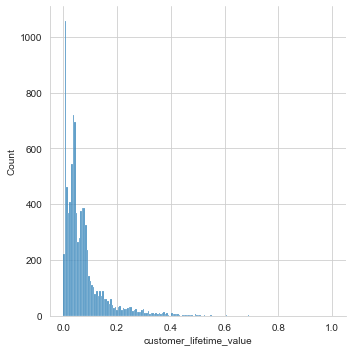

<Figure size 432x288 with 0 Axes>

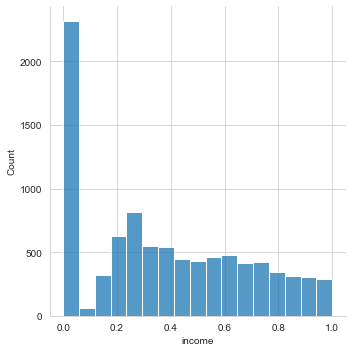

<Figure size 432x288 with 0 Axes>

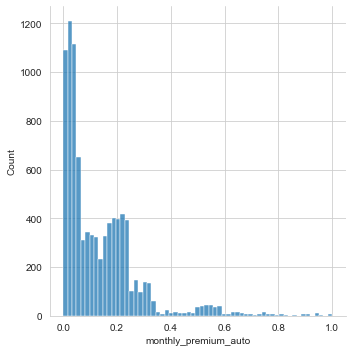

<Figure size 432x288 with 0 Axes>

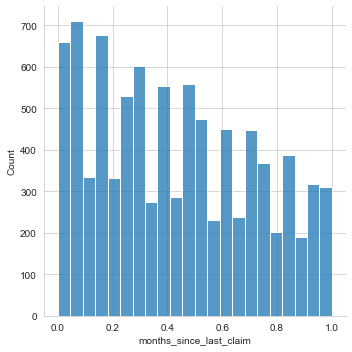

<Figure size 432x288 with 0 Axes>

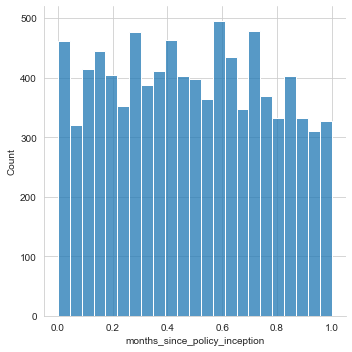

<Figure size 432x288 with 0 Axes>

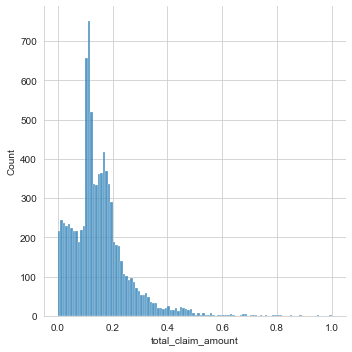

<Figure size 432x288 with 0 Axes>

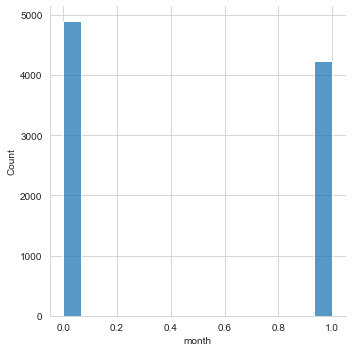

<Figure size 432x288 with 0 Axes>

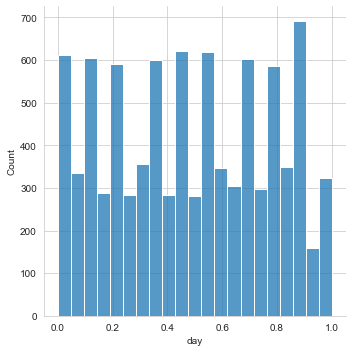

In [39]:
plotting(minmax_continuous_df)

In [40]:
standard_continuous_df = scaling_methods(continuous_df,'standard')
standard_continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,month,day,week
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.169640,1.075304,0.986776,0.207521
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,2.400737,-0.929969,1.795716,-0.130920
2,0.710636,0.365710,0.429596,0.288205,-0.360680,0.455734,1.075304,0.408962,0.094707
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,0.329769,-0.929969,0.524524,-0.356548
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-1.018843,1.075304,-1.440045,-0.130920


<Figure size 432x288 with 0 Axes>

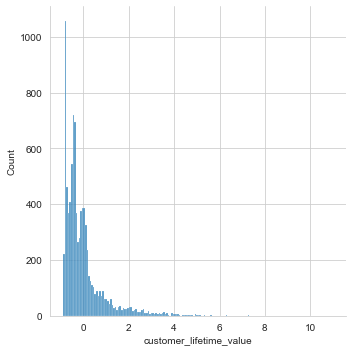

<Figure size 432x288 with 0 Axes>

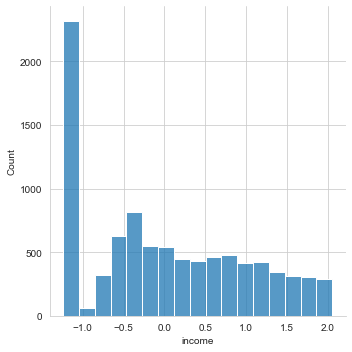

<Figure size 432x288 with 0 Axes>

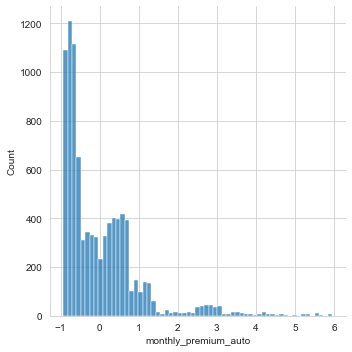

<Figure size 432x288 with 0 Axes>

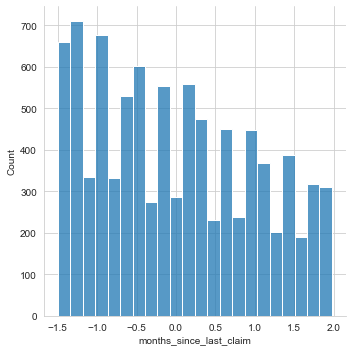

<Figure size 432x288 with 0 Axes>

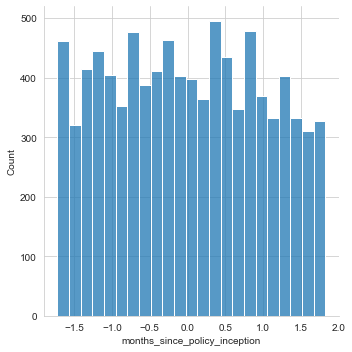

<Figure size 432x288 with 0 Axes>

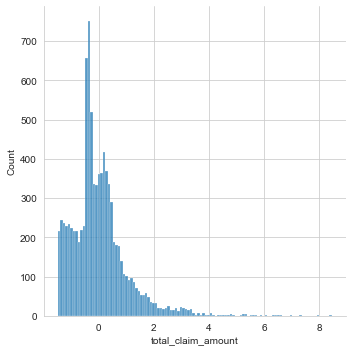

<Figure size 432x288 with 0 Axes>

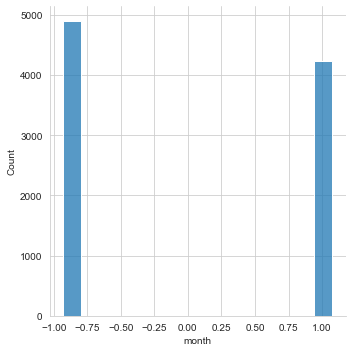

<Figure size 432x288 with 0 Axes>

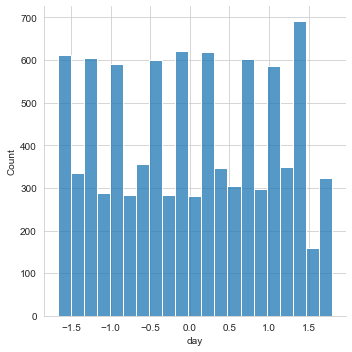

In [41]:
plotting(standard_continuous_df)

In [42]:
normalize_continuous_df = scaling_methods(continuous_df,'normalize')
normalize_continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,month,day,week
0,0.049048,0.998772,0.001225,0.000568,0.000089,0.006830,0.000035,0.000426,0.000142
1,0.986997,0.000000,0.013293,0.001838,0.005939,0.160004,0.000141,0.004384,0.000707
2,0.255478,0.966747,0.002141,0.000357,0.000753,0.011230,0.000040,0.000377,0.000139
3,0.997470,0.000000,0.013829,0.002348,0.008480,0.069128,0.000130,0.002609,0.000391
4,0.064055,0.997940,0.001662,0.000273,0.001002,0.003145,0.000046,0.000068,0.000114


<Figure size 432x288 with 0 Axes>

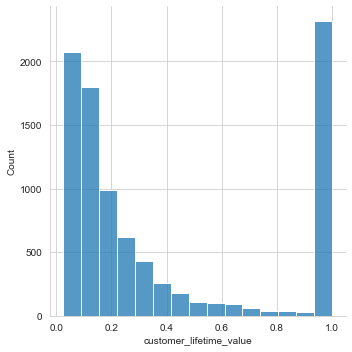

<Figure size 432x288 with 0 Axes>

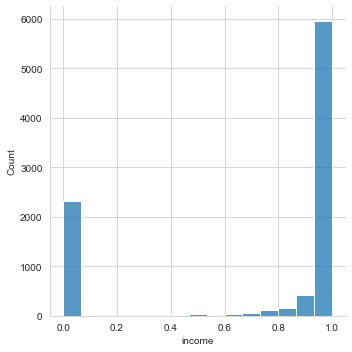

<Figure size 432x288 with 0 Axes>

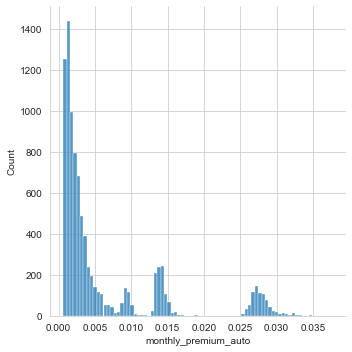

<Figure size 432x288 with 0 Axes>

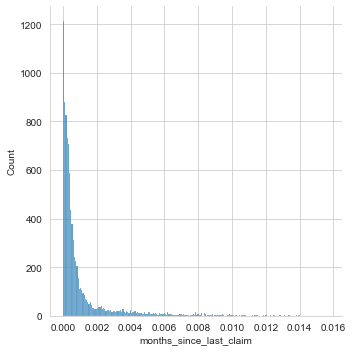

<Figure size 432x288 with 0 Axes>

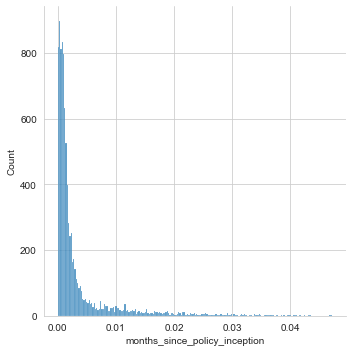

<Figure size 432x288 with 0 Axes>

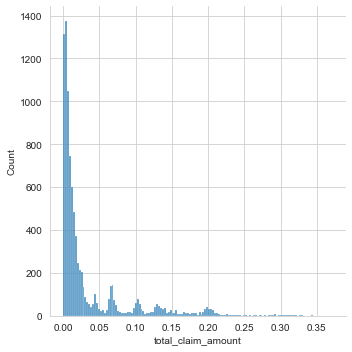

<Figure size 432x288 with 0 Axes>

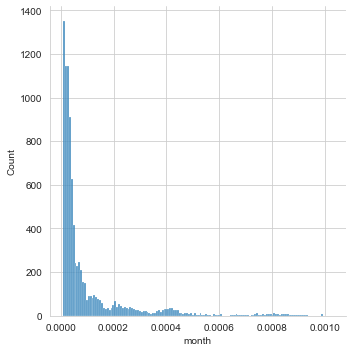

<Figure size 432x288 with 0 Axes>

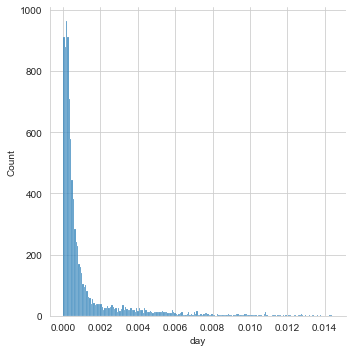

In [43]:
plotting(normalize_continuous_df)

In [44]:
#I choose standard_continuous_df, it seems a bit better scaled.

In [45]:
summary = continuous_df[['customer_lifetime_value','monthly_premium_auto','total_claim_amount']].describe().T
summary['iqr'] = summary['75%']-summary['25%']
summary['mean'] = list(map(lambda x: round(x,2), summary['mean']))
summary

,count,mean,std,min,25%,50%,75%,max,iqr
customer_lifetime_value,9134.0,8004.94,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190,4967.915247
monthly_premium_auto,9134.0,93.22,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000,41.000000
total_claim_amount,9134.0,434.09,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678,275.256594


All of them have relevant outliers.
But if I drop the outliers I will have to remove a lot of rows in each feature, I can't do that.

In [46]:
test = continuous_df.copy()
iqr = np.percentile(test['customer_lifetime_value'],75) - np.percentile(test['customer_lifetime_value'],25)
upper_limit = np.percentile(test['customer_lifetime_value'],75) + 1.5*iqr
lower_limit = np.percentile(test['customer_lifetime_value'],25) - 1.5*iqr

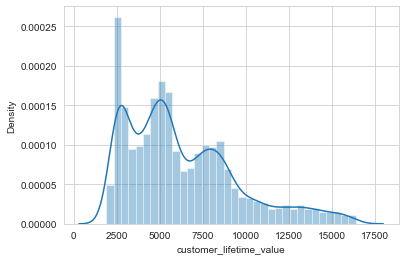

In [47]:
test2 = test[(test['customer_lifetime_value']>lower_limit) & (test['customer_lifetime_value']<upper_limit)]
sns.distplot(test2['customer_lifetime_value'])
plt.show()

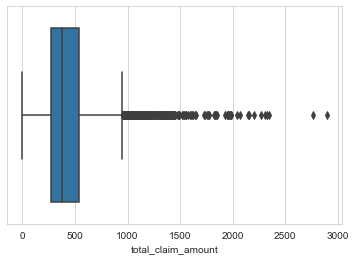

In [48]:
sns.boxplot(test2['total_claim_amount'])
plt.show()

In [49]:
test2.shape, continuous_df.shape

((8317, 9), (9134, 9))

#### Cluster the discrete columns

In [50]:
discrete_df.head()

,number_of_open_complaints,number_of_policies
customer,,
BU79786,0,1
QZ44356,0,8
AI49188,0,2
WW63253,0,7
HB64268,0,1


In [51]:
discrete_df.number_of_open_complaints = list(map(lambda x: 'None' if x == 0 else 'More',discrete_df.number_of_open_complaints))
discrete_df.number_of_open_complaints.value_counts()

None    7252
More    1882
Name: number_of_open_complaints, dtype: int64

In [52]:
discrete_df.number_of_policies = list(map(lambda x: '1' if x == 1 else ('2' if x == 2 else ('3' if x == 3 else '+3')),discrete_df.number_of_policies))
discrete_df.number_of_policies.value_counts()

1     3251
+3    2421
2     2294
3     1168
Name: number_of_policies, dtype: int64

In [53]:
categorical = categorical.set_index('customer')
categorical

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,employment_status
customer,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,Employed
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,Unemployed
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,Employed
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,Unemployed
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,Employed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize,Employed
PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize,Employed
TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize,Unemployed


In [54]:
new_categorical = pd.concat([categorical, discrete_df], axis=1)
new_categorical.head()

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size,employment_status,number_of_open_complaints,number_of_policies
customer,,,,,,,,,,,,,,,,,
BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,Employed,None,1
QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,Unemployed,None,+3
AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,Employed,None,2
WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,Unemployed,None,+3
HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,Employed,None,1


In [55]:
new_categorical = new_categorical[['state','response','coverage','education','gender','location_code','marital_status','policy_type','renew_offer_type','sales_channel','vehicle_size','employment_status','number_of_open_complaints','number_of_policies']]

In [56]:
new_categorical_dum = pd.get_dummies(new_categorical)
new_categorical_dum

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small,employment_status_Disabled,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,number_of_open_complaints_More,number_of_open_complaints_None,number_of_policies_+3,number_of_policies_1,number_of_policies_2,number_of_policies_3
customer,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BU79786,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
QZ44356,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0
AI49188,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
WW63253,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0
HB64268,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LA72316,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0
PK87824,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
TD14365,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0


In [57]:
standard_continuous_df.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,month,day,week
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.169640,1.075304,0.986776,0.207521
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,2.400737,-0.929969,1.795716,-0.130920
2,0.710636,0.365710,0.429596,0.288205,-0.360680,0.455734,1.075304,0.408962,0.094707
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,0.329769,-0.929969,0.524524,-0.356548
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-1.018843,1.075304,-1.440045,-0.130920


In [58]:
new_categorical = new_categorical_dum.reset_index(drop='customer')
new_categorical.head()

,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small,employment_status_Disabled,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,number_of_open_complaints_More,number_of_open_complaints_None,number_of_policies_+3,number_of_policies_1,number_of_policies_2,number_of_policies_3
0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0
2,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0
4,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0


In [59]:
new_data = pd.concat([standard_continuous_df, new_categorical], axis=1)
new_data.head()

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount,month,day,week,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small,employment_status_Disabled,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,number_of_open_complaints_More,number_of_open_complaints_None,number_of_policies_+3,number_of_policies_1,number_of_policies_2,number_of_policies_3
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,-0.169640,1.075304,0.986776,0.207521,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,2.400737,-0.929969,1.795716,-0.130920,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0
2,0.710636,0.365710,0.429596,0.288205,-0.360680,0.455734,1.075304,0.408962,0.094707,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,0.329769,-0.929969,0.524524,-0.356548,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,-1.018843,1.075304,-1.440045,-0.130920,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0


# Lab Day 3 Morning

# Lab | Comparing regression models


For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs. 

### Instructions

1. In this final lab, we will model our data. Import sklearn `train_test_split` and separate the data.
2. Try a simple linear regression with all the data to see whether we are getting good results.
3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
4. Use the function to check `LinearRegressor` and `KNeighborsRegressor`.
5. You can check also the `MLPRegressor` for this task!
6. Check and discuss the results.


In [60]:
df = new_data.copy()
y = df['total_claim_amount']
X = df.drop(['total_claim_amount'],axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)


In [61]:
X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,month,day,week,state_Arizona,state_California,state_Nevada,state_Oregon,state_Washington,response_No,response_Yes,coverage_Basic,coverage_Extended,coverage_Premium,education_Bachelor,education_College,education_Doctor,education_High School or Below,education_Master,gender_F,gender_M,location_code_Rural,location_code_Suburban,location_code_Urban,marital_status_Divorced,marital_status_Married,marital_status_Single,policy_type_Corporate Auto,policy_type_Personal Auto,policy_type_Special Auto,renew_offer_type_Offer1,renew_offer_type_Offer2,renew_offer_type_Offer3,renew_offer_type_Offer4,sales_channel_Agent,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_size_Large,vehicle_size_Medsize,vehicle_size_Small,employment_status_Disabled,employment_status_Employed,employment_status_Medical Leave,employment_status_Retired,employment_status_Unemployed,number_of_open_complaints_More,number_of_open_complaints_None,number_of_policies_+3,number_of_policies_1,number_of_policies_2,number_of_policies_3
0,-0.762878,0.612827,-0.703925,1.678099,-1.543287,1.075304,0.986776,0.207521,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
1,-0.149245,-1.239617,0.022691,-0.208186,-0.217334,-0.929969,1.795716,-0.130920,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0
2,0.710636,0.365710,0.429596,0.288205,-0.360680,1.075304,0.408962,0.094707,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
3,-0.052263,-1.239617,0.371467,0.288205,0.606907,-0.929969,0.524524,-0.356548,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0
4,-0.755575,0.203390,-0.587666,-0.307465,-0.145661,1.075304,-1.440045,-0.130920,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,2.241590,1.128558,-0.587666,0.288205,1.466984,1.075304,-0.631104,-0.018107,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0
9130,-0.714411,-0.528450,-0.413278,-0.108908,-0.719046,1.075304,-0.399979,-0.018107,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0
9131,0.023135,-1.239617,-0.238891,-0.605299,-0.396517,1.075304,-1.093356,-0.130920,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0
9132,-0.069935,-0.517356,0.080820,1.876656,-1.614960,1.075304,-1.440045,-0.130920,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1


2. Try a simple linear regression with all the data to see whether we are getting good results.

In [62]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions = lm.predict(X_test)

print("The R2 of the linear model is: ",round(r2_score(y_test, predictions),3))

The R2 of the linear model is:  0.769


In [63]:
mse = mean_squared_error(y_test, predictions)
print(mse)

0.21736755392762303


In [64]:
import math
rmse = math.sqrt(mse)
print(rmse)

0.4662269339362785


In [65]:
r2 = r2_score(y_test, predictions)
print("The R2 value on the TEST set is: ",round(r2,2))

The R2 value on the TEST set is:  0.77


In [66]:
N = len(X_test)
p = X_test.shape[1]
adj_r2 = 1-((1-r2)*(N-1)/(N-p-1))
print("The R_adj^{2} value on the TEST set is: ",round(adj_r2,2))

The R_adj^{2} value on the TEST set is:  0.77


3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.
4. Use the function to check LinearRegressor and KNeighborsRegressor.

In [67]:
def models_errors_process(df,list_models,y):
    from sklearn import linear_model
    from sklearn.neighbors import KNeighborsRegressor
    from sklearn.neural_network import MLPRegressor
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
    from sklearn.model_selection import train_test_split
    X = df.drop([y],axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, df[y], test_size=0.4, random_state=100)
    errors = []
    for model_name in list_models:
        if model_name == 'linear':
            lm = linear_model.LinearRegression()
            model = lm.fit(X_train,y_train)
            predictions_test = lm.predict(X_test)
            predictions_train = lm.predict(X_train)

        elif model_name == 'kneighbors':
            knn = KNeighborsRegressor(n_neighbors=4)
            model = knn.fit(X_train, y_train)
            predictions_test = knn.predict(X_test)
            predictions_train = knn.predict(X_train)
            
        elif model_name == 'mlpregressor':
            model = MLPRegressor(random_state=1, max_iter=500).fit(X_train, y_train)
            predictions_test = model.predict(X_test)
            prediction_train = model.predict(X_test)
        
        MAE_train = mean_absolute_error(y_train,predictions_train)
        MSE_train = mean_squared_error(y_train,predictions_train)
        RMSE_train = np.sqrt(MSE_train)
        R2_train = r2_score(y_train,predictions_train)

        MAE_test = mean_absolute_error(y_test,predictions_test)
        MSE_test = mean_squared_error(y_test,predictions_test)
        RMSE_test = np.sqrt(MSE_test)
        R2_test = r2_score(y_test,predictions_test)
        
        errors.append((MAE_train,MSE_train,RMSE_train,R2_train,
                 MAE_test, MSE_test, RMSE_test, R2_test))

    errors = np.array(errors)
    result_df = pd.DataFrame(errors, columns=['MAE_train','MSE_train','RMSE_train','R2_train','MAE_test','MSE_test','RMSE_test', 'R2_test']).T
    result_df.columns = list_models

    return result_df

f = new_data.copy()
models_errors_process(f,['linear','kneighbors','mlpregressor'],'total_claim_amount')

,linear,kneighbors,mlpregressor
MAE_train,0.328690,0.295520,0.295520
MSE_train,0.237017,0.214145,0.214145
RMSE_train,0.486844,0.462759,0.462759
R2_train,0.771691,0.793723,0.793723
MAE_test,0.327018,0.390531,0.358307
MSE_test,0.217368,0.333286,0.257401
RMSE_test,0.466227,0.577309,0.507347
R2_test,0.769150,0.646042,0.726634


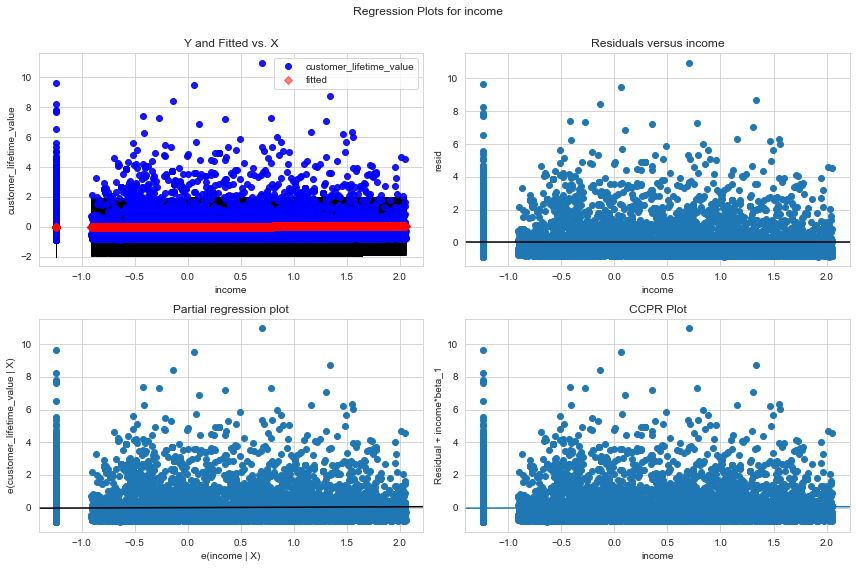

In [73]:
from statsmodels.formula.api import ols
model = ols('customer_lifetime_value ~ income', data=f).fit()

fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'income', fig=fig)

In [ ]:
import statsmodels.api as sm
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
predictions_test = lm.predict(X_test)
predictions_train = lm.predict(X_train)



5. You can check also the `MLPRegressor` for this task!
6. Check and discuss the results.

All outputs considered, the linear model appears to be most accurate, as it has the highest R2 test and the lowest errors on average.

**R Square  and R Square Adjusted** is a good measure to determine how well the model fits the dependent variables. So the highest value is in the linear model.

# Afternoon lab

# Lab | Random variable distributions
Refer to the files_for_lab/we_fn_use_c_marketing_customer_value_analysis.csv dataset.

Instructions
- Get the numerical variables from our dataset.
- Check using a distribution plot if the variables fit the theoretical - - normal or exponential distribution.
- Check if any of the transformations (log-transform, etc.) we have seen up to this point changes the result.

In [ ]:
numerical.head()

In [ ]:
plotting(numerical)

In [ ]:
def log_transform_clean(x):
    if np.isfinite(x) and x!=0:
        return np.log(x)
    else:
        return np.NaN
def sqrt_transform_clean(x):
    if np.isfinite(x) and x>=0:
        return np.sqrt(x)
    else:
        return np.NaN #we return NaNs so we can replace them later

In [ ]:
clean_num_df = numerical.copy()

In [ ]:
clean_num_df['customer_lifetime_value'] = list(map(log_transform_clean,clean_num_df['customer_lifetime_value']))
clean_num_df['monthly_premium_auto'] = list(map(log_transform_clean,clean_num_df['monthly_premium_auto']))
clean_num_df['months_since_last_claim'] = list(map(log_transform_clean,clean_num_df['months_since_last_claim']))
clean_num_df['number_of_open_complaints'] = list(map(log_transform_clean,clean_num_df['number_of_open_complaints']))
clean_num_df['number_of_policies'] = list(map(log_transform_clean,clean_num_df['number_of_policies']))
#clean_num_df['total_claim_amount'] = list(map(log_transform_clean,clean_num_df['total_claim_amount'] ))

In [ ]:
plotting(clean_num_df)

# activity

In [ ]:
i=[10, 100, 1000, 10000] 
x = np.random.binomial(n=i, p=0.5, size=len(i))
plt.plot(x)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

def bin_dist():
    test_list = [10,100,1000,10000]
    for i in test_list:
        plt.figure()
        x= np.random.binomial(n=i,p=0.5,size=i)
        #print(x)
        #print('--',i,'--')
        #plt.figure()
        sns.displot(x, kde=True)
        plt.show()
        
bin_dist()

In [ ]:
!pip install -U seaborn

In [ ]:
np.__version__

4.06 Activity 3

Try to plot a Binomial distribution for each n in [10, 100, 1000, 10000] and a constant p = 0.5. What can you see when n tends to infinite? Does it look familiar to you? What happens with the mean of the created samples?

# 4.06 Activity 4

So far we have seen quite a lot of distributions, but is there one to rule them all? This is a simulator for some distributions, try to play with it as much as you can and think about the results you are getting. Hint: Try to customize your distributions and extract some means from it.